In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras_preprocessing import image
from keras_preprocessing.image import img_to_array



img_dir = 'helmet_generation'  # 이미지가 들어있는 폴더 경로
img_width = 64  # 이미지 가로 길이
img_height = 64  # 이미지 세로 길이

# 이미지를 numpy array로 변환
def img_to_np_array(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    x = img_to_array(img)
    return x

# 이미지 경로와 라벨을 읽어들임
image_paths = []
labels = []
for subdir, _, files in os.walk(img_dir):
    for file in files:
        img_path = os.path.join(subdir, file)
        if img_path.endswith(".png"):
            label = img_path.split("/")[-1]  # 폴더 이름을 라벨로 사용
            image_paths.append(img_path)
            labels.append(label)

# 이미지를 numpy array로 변환
X = np.array([img_to_np_array(img_path) for img_path in image_paths])
y = np.array(labels)

# train/test set으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
y_train

array(['helmet_generation\\Without_Helmet\\withoutnoiseAdded_7776.png',
       'helmet_generation\\Without_Helmet\\withoutnoiseAdded_1785.png',
       'helmet_generation\\Without_Helmet\\withoutrotated_7174.png', ...,
       'helmet_generation\\Without_Helmet\\withoutnoiseAdded_6442.png',
       'helmet_generation\\Without_Helmet\\withoutinverted_3287.png',
       'helmet_generation\\With_Helmet\\withnoiseAdded_7811.png'],
      dtype='<U59')

In [4]:
# Without_Helmet에 해당하는 파일은 0, With_Helmet에 해당하는 파일은 1로 바꿔줌
y_train = np.array([0 if 'Without_Helmet' in label else 1 for label in y_train])
y_test = np.array([0 if 'Without_Helmet' in label else 1 for label in y_test])

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(64, 64, 3), activation='relu' ))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=10)

Epoch 1/10
375/375 [==============================] - 7s 11ms/step - loss: 10.5657 - accuracy: 0.8328 - val_loss: 0.2129 - val_accuracy: 0.9222
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1311 - accuracy: 0.9529 - val_loss: 0.1426 - val_accuracy: 0.9480
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0543 - accuracy: 0.9818 - val_loss: 0.1429 - val_accuracy: 0.9580
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0282 - accuracy: 0.9918 - val_loss: 0.1421 - val_accuracy: 0.9563
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0183 - accuracy: 0.9950 - val_loss: 0.1736 - val_accuracy: 0.9590
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.2504 - val_accuracy: 0.9415
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0637 - accuracy: 0.9780 - val_loss: 0.2153 - val_accuracy: 0.935

In [6]:
history = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=10)

#테스트 정확도 출력
print('\n test acc: %.4f' %(model.evaluate(X_test, y_test)[1])) 

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0752 - accuracy: 0.9803 - val_loss: 0.2354 - val_accuracy: 0.9503
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.4058 - val_accuracy: 0.9415
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0378 - accuracy: 0.9891 - val_loss: 0.2698 - val_accuracy: 0.9448
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0190 - accuracy: 0.9946 - val_loss: 0.2125 - val_accuracy: 0.9585
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0122 - accuracy: 0.9970 - val_loss: 0.2026 - val_accuracy: 0.9580
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.2438 - val_accuracy: 0.9578
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0498 - accuracy: 0.9860 - val_loss: 0.2423 - val_accuracy: 0.9460

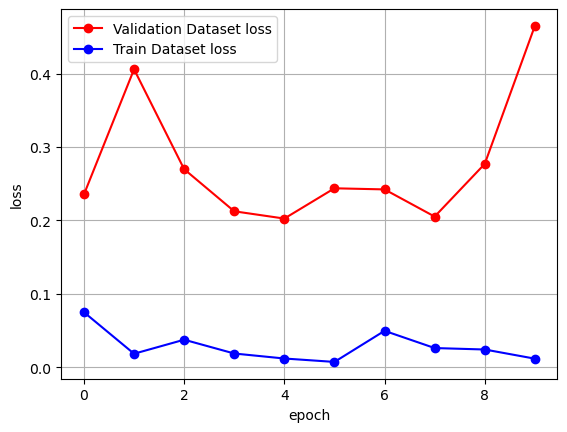

In [7]:
#학습용 데이터 셋/검증 셋 오차 저장

y_vloss=history.history['val_loss']
y_loss=history.history['loss']

#그래프로 표현
x_len=np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='o', c='red', label='Validation Dataset loss')
plt.plot(x_len, y_loss, marker='o', c='blue', label='Train Dataset loss')

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [8]:
# 모델 평가
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# 모델 예측
y_pred = model.predict(X_test)

Test loss: 0.4681018590927124
Test accuracy: 0.9315000176429749
125/125 [==============================] - 0s 2ms/step


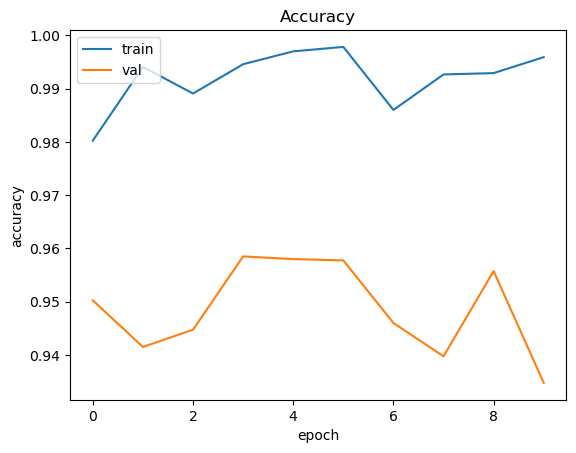

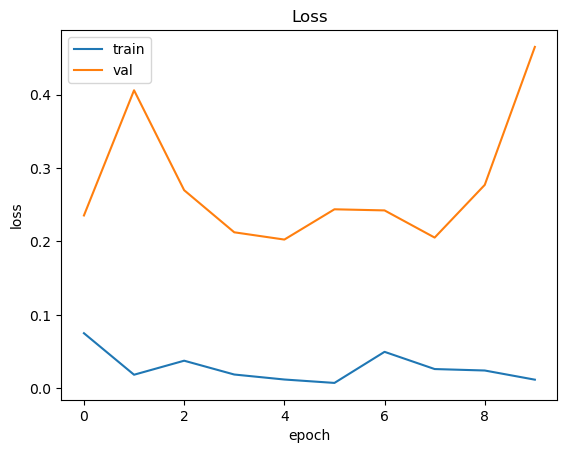

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
import matplotlib.pyplot as plt

# 정확도 그래프 출력
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 손실 그래프 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 모델 시각화
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# 모델 저장
model.save('my_model.h5')